In [1]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [179]:
data = yf.download(tickers='IRCTC.NS', period='1d', interval='5m')
data.to_csv("IRCTC.csv")

[*********************100%***********************]  1 of 1 completed


In [2]:
df_temp=pd.read_csv("TATACHEM.csv")


df_temp.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1551,2021-10-05 10:06:00+05:30,935.950012,936.200012,934.700012,936.200012,936.200012,13395
1552,2021-10-05 10:07:00+05:30,935.900024,937.450012,935.900024,936.849976,936.849976,13277
1553,2021-10-05 10:08:00+05:30,936.500000,936.900024,935.000000,936.799988,936.799988,10620
1554,2021-10-05 10:09:00+05:30,936.099976,938.000000,936.049988,938.000000,938.000000,8813
1555,2021-10-05 10:10:58+05:30,938.099976,938.099976,938.099976,938.099976,938.099976,0


In [21]:

#df_temp = pd.read_csv("IRCTC.csv")

In [3]:
df_temp

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29 09:15:00+05:30,904.299988,904.299988,899.250000,900.400024,900.400024,0
1,2021-09-29 09:16:00+05:30,899.450012,900.049988,898.849976,899.650024,899.650024,31145
2,2021-09-29 09:17:00+05:30,901.000000,901.000000,896.099976,896.950012,896.950012,23329
3,2021-09-29 09:18:00+05:30,896.000000,896.700012,895.400024,896.700012,896.700012,24065
4,2021-09-29 09:19:00+05:30,897.000000,898.400024,896.450012,896.450012,896.450012,11013
...,...,...,...,...,...,...,...
1551,2021-10-05 10:06:00+05:30,935.950012,936.200012,934.700012,936.200012,936.200012,13395
1552,2021-10-05 10:07:00+05:30,935.900024,937.450012,935.900024,936.849976,936.849976,13277
1553,2021-10-05 10:08:00+05:30,936.500000,936.900024,935.000000,936.799988,936.799988,10620
1554,2021-10-05 10:09:00+05:30,936.099976,938.000000,936.049988,938.000000,938.000000,8813


In [4]:

df=df_temp[["Datetime","Close"]]


In [5]:
df[20:]

,Datetime,Close
20,2021-09-29 09:35:00+05:30,900.700012
21,2021-09-29 09:36:00+05:30,901.049988
22,2021-09-29 09:37:00+05:30,900.250000
23,2021-09-29 09:38:00+05:30,901.000000
24,2021-09-29 09:39:00+05:30,901.700012
...,...,...
1551,2021-10-05 10:06:00+05:30,936.200012
1552,2021-10-05 10:07:00+05:30,936.849976
1553,2021-10-05 10:08:00+05:30,936.799988
1554,2021-10-05 10:09:00+05:30,938.000000


In [6]:
df

,Datetime,Close
0,2021-09-29 09:15:00+05:30,900.400024
1,2021-09-29 09:16:00+05:30,899.650024
2,2021-09-29 09:17:00+05:30,896.950012
3,2021-09-29 09:18:00+05:30,896.700012
4,2021-09-29 09:19:00+05:30,896.450012
...,...,...
1551,2021-10-05 10:06:00+05:30,936.200012
1552,2021-10-05 10:07:00+05:30,936.849976
1553,2021-10-05 10:08:00+05:30,936.799988
1554,2021-10-05 10:09:00+05:30,938.000000


In [7]:
date = pd.read_csv("date.csv")
df["Datetime"] = date["Date"]

<ipython-input-7-6d58ee315ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"] = date["Date"]


In [8]:
df

,Datetime,Close
0,9/23/2020,900.400024
1,9/24/2020,899.650024
2,9/25/2020,896.950012
3,9/26/2020,896.700012
4,9/27/2020,896.450012
...,...,...
1551,12/22/2024,936.200012
1552,12/23/2024,936.849976
1553,12/24/2024,936.799988
1554,12/25/2024,938.000000


In [9]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [10]:
#df["Datetime"]=pd.to_datetime(df["Datetime"])

In [11]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [12]:
df.columns=['ds','y']

In [13]:
df[-20:]

,ds,y
1536,12/7/2024,946.500000
1537,12/8/2024,946.500000
1538,12/9/2024,944.750000
1539,12/10/2024,943.349976
1540,12/11/2024,940.049988
1541,12/12/2024,938.500000
1542,12/13/2024,938.500000
1543,12/14/2024,935.000000
1544,12/15/2024,936.000000
1545,12/16/2024,936.299988


In [14]:
m= Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [27]:
future = m.make_future_dataframe(periods=271,freq='D')
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-23,899.099062,893.424152,899.762598,899.099062,899.099062,-2.575347,-2.575347,-2.575347,-2.751109,...,0.093412,0.093412,0.093412,0.082350,0.082350,0.082350,0.0,0.0,0.0,896.523715
1,2020-09-24,899.171815,893.318630,900.292450,899.171815,899.171815,-2.378694,-2.378694,-2.378694,-2.751109,...,0.013628,0.013628,0.013628,0.358787,0.358787,0.358787,0.0,0.0,0.0,896.793121
2,2020-09-25,899.244567,893.589018,900.622472,899.244567,899.244567,-2.111112,-2.111112,-2.111112,-2.751109,...,0.028344,0.028344,0.028344,0.611652,0.611652,0.611652,0.0,0.0,0.0,897.133455
3,2020-09-26,899.317319,893.823672,900.686412,899.317319,899.317319,-1.983799,-1.983799,-1.983799,-2.751109,...,-0.075534,-0.075534,-0.075534,0.842844,0.842844,0.842844,0.0,0.0,0.0,897.333520
4,2020-09-27,899.390071,894.223874,901.130211,899.390071,899.390071,-1.803265,-1.803265,-1.803265,-2.751109,...,-0.106987,-0.106987,-0.106987,1.054831,1.054831,1.054831,0.0,0.0,0.0,897.586806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2025-09-19,946.572138,819.190061,1061.311854,823.088610,1065.092488,-4.096070,-4.096070,-4.096070,-2.751109,...,0.028344,0.028344,0.028344,-1.373306,-1.373306,-1.373306,0.0,0.0,0.0,942.476068
1823,2025-09-20,946.623148,819.742530,1062.068545,822.123857,1066.017093,-3.816709,-3.816709,-3.816709,-2.751109,...,-0.075534,-0.075534,-0.075534,-0.990066,-0.990066,-0.990066,0.0,0.0,0.0,942.806440
1824,2025-09-21,946.674159,820.181609,1064.248530,821.159105,1067.019782,-3.489545,-3.489545,-3.489545,-2.751109,...,-0.106987,-0.106987,-0.106987,-0.631449,-0.631449,-0.631449,0.0,0.0,0.0,943.184613
1825,2025-09-22,946.725169,819.435175,1064.018527,820.194352,1067.777250,-3.070431,-3.070431,-3.070431,-2.751109,...,-0.021078,-0.021078,-0.021078,-0.298244,-0.298244,-0.298244,0.0,0.0,0.0,943.654738


In [28]:
print(forecast[["ds","yhat"]][-25:])
print(df[-10:])
forecast.dtypes
df.dtypes

             ds        yhat
1802 2025-08-30  932.770444
1803 2025-08-31  933.081293
1804 2025-09-01  933.533930
1805 2025-09-02  934.014383
1806 2025-09-03  934.454760
1807 2025-09-04  934.813330
1808 2025-09-05  935.288276
1809 2025-09-06  935.664754
1810 2025-09-07  936.131605
1811 2025-09-08  936.731182
1812 2025-09-09  937.346558
1813 2025-09-10  937.906994
1814 2025-09-11  938.368104
1815 2025-09-12  938.925694
1816 2025-09-13  939.362904
1817 2025-09-14  939.866987
1818 2025-09-15  940.479201
1819 2025-09-16  941.082070
1820 2025-09-17  941.604878
1821 2025-09-18  942.003866
1822 2025-09-19  942.476068
1823 2025-09-20  942.806440
1824 2025-09-21  943.184613
1825 2025-09-22  943.654738
1826 2025-09-23  944.102680
              ds           y
1546  12/17/2024  936.849976
1547  12/18/2024  934.599976
1548  12/19/2024  936.400024
1549  12/20/2024  934.950012
1550  12/21/2024  935.950012
1551  12/22/2024  936.200012
1552  12/23/2024  936.849976
1553  12/24/2024  936.799988
1554  12/25

ds     object
y     float64
dtype: object

In [29]:
se = np.square(forecast.loc[:, 'yhat'] - df["y"])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse


2.0815025093717208

In [30]:
mse

4.33265269652077

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
mse = mean_squared_error(df['y'], forecast.loc[:, 'yhat'][:-271])
mae = mean_absolute_error(df['y'], forecast.loc[:, 'yhat'][:-271])
r2 = r2_score(df['y'], forecast.loc[:, 'yhat'][:-271])

In [33]:
mse


4.332652696520773

In [34]:
mae

1.4973364700957792

In [35]:
r2

0.9509539180579625

In [36]:
forecast[-271:-245]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1556,2024-12-27,933.003363,934.933539,941.697859,933.003363,933.003363,5.365512,5.365512,5.365512,-2.751109,...,0.028344,0.028344,0.028344,8.088277,8.088277,8.088277,0.0,0.0,0.0,938.368875
1557,2024-12-28,933.054373,934.658920,941.498842,933.054373,933.054373,5.085609,5.085609,5.085609,-2.751109,...,-0.075534,-0.075534,-0.075534,7.912252,7.912252,7.912252,0.0,0.0,0.0,938.139982
1558,2024-12-29,933.105383,934.686430,941.394014,933.105383,933.105383,4.909893,4.909893,4.909893,-2.751109,...,-0.106987,-0.106987,-0.106987,7.767989,7.767989,7.767989,0.0,0.0,0.0,938.015277
1559,2024-12-30,933.156394,934.695502,941.264317,933.156394,933.156394,4.883109,4.883109,4.883109,-2.751109,...,-0.021078,-0.021078,-0.021078,7.655295,7.655295,7.655295,0.0,0.0,0.0,938.039502
1560,2024-12-31,933.207404,934.823864,941.460955,933.207404,933.207404,4.890317,4.890317,4.890317,-2.751109,...,0.068216,0.068216,0.068216,7.573210,7.573210,7.573210,0.0,0.0,0.0,938.097722
1561,2025-01-01,933.258415,934.565477,941.527318,933.258415,933.258415,4.862349,4.862349,4.862349,-2.751109,...,0.093412,0.093412,0.093412,7.520046,7.520046,7.520046,0.0,0.0,0.0,938.120764
1562,2025-01-02,933.309425,934.923137,941.502591,933.308975,933.309425,4.755963,4.755963,4.755963,-2.751109,...,0.013628,0.013628,0.013628,7.493444,7.493444,7.493444,0.0,0.0,0.0,938.065388
1563,2025-01-03,933.360436,934.600073,941.496651,933.278305,933.360990,4.767678,4.767678,4.767678,-2.751109,...,0.028344,0.028344,0.028344,7.490443,7.490443,7.490443,0.0,0.0,0.0,938.128114
1564,2025-01-04,933.411446,934.563115,941.651829,933.287133,933.431931,4.680926,4.680926,4.680926,-2.751109,...,-0.075534,-0.075534,-0.075534,7.507569,7.507569,7.507569,0.0,0.0,0.0,938.092372
1565,2025-01-05,933.462457,934.612034,941.569689,933.228688,933.562308,4.682837,4.682837,4.682837,-2.751109,...,-0.106987,-0.106987,-0.106987,7.540933,7.540933,7.540933,0.0,0.0,0.0,938.145294


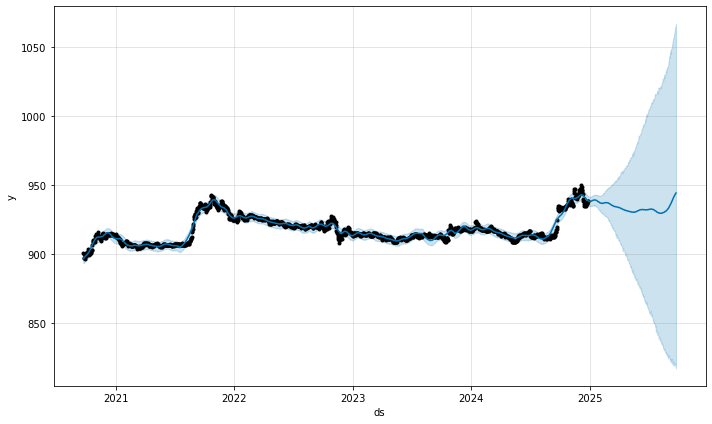

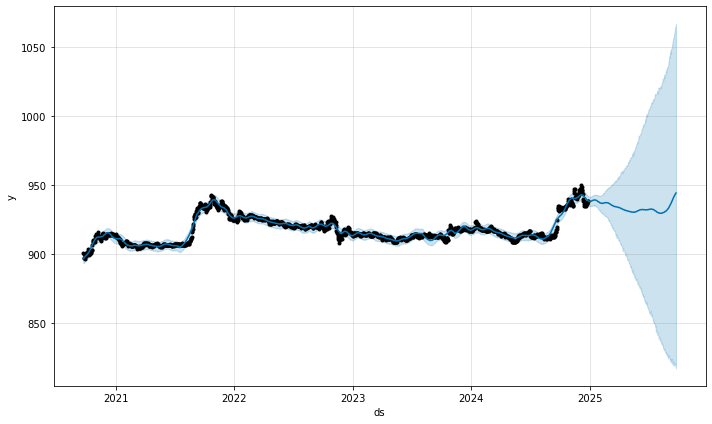

In [37]:
m.plot(forecast)

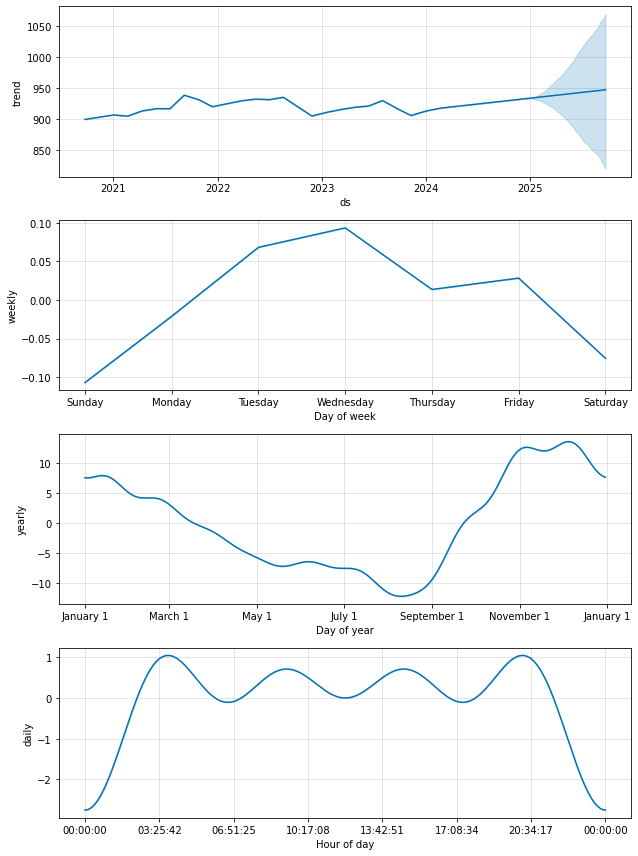

In [38]:
plot2 = m.plot_components(forecast)